In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pprint

In [3]:
#
tag = '.ro5'
city_num = 16
#
resolution = 12
POP='vld_cty_'
#
SUF = '.gl5'
dtype = 'float32'
gl5shape = (2160, 4320)
#
left = -47
right = -40
bottom = -24
top = -20
#
nx, ny = (right - left)*resolution, (top - bottom)*resolution
rgnshape = (ny, nx)
img_extent = (left, right, bottom, top)
#
upperindex = (90-top)*resolution
lowerindex = (90-bottom)*resolution
leftindex = (180+left)*resolution
rightindex = (180+right)*resolution
#
glbdir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
rgndir = f"/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region"

In [4]:
# original
# map/org/Aoba/existing_origin.gl5
# map/org/Aoba/existing_destination_1.gl5
#
# prep_map_lcan_gl5.sh
# map/out/can_org_/canorg.x.within.1.CAMA.gl5
# map/out/can_org_/canorg.y.within.1.CAMA.gl5
# map/out/can_org_/canorg.l.within.1.CAMA.gl5
# map/out/can_des_/candes.l.within.1.CAMA.bin
# map/out/can_sco_/cansco.within.1.CAMA.gl5
# map/out/can_cnt_/cancnt.within.1.CAMA.gl5
#
# prep_map_K14_gl5.sh
# map/out/can_org_/canorg.l.canal.ext.gl5
# map/out/can_des_/canorg.l.canal.ext.bin
# map/out/can_org_/canorg.l.merged.ext.1.CAMA.gl5
# map/out/can_des_/candes.l.merged.ext.1.CAMA.bin

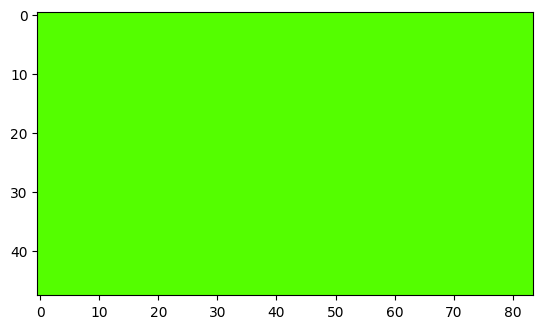

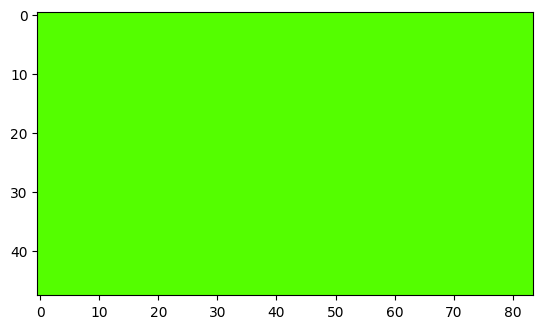

In [5]:
# original
origin_path = f'{glbdir}/dat/can_ext_/existing_origin{SUF}'
destination_path = f'{glbdir}/dat/can_ext_/existing_destination_1{SUF}'
path_list = [origin_path, destination_path]

origin = np.fromfile(origin_path, dtype=dtype).reshape(gl5shape)
org_cropped = origin[upperindex:lowerindex, leftindex:rightindex]
plt.imshow(org_cropped, cmap='prism_r')
plt.show()

destiantion = np.fromfile(destination_path, dtype=dtype).reshape(gl5shape)
des_cropped = destiantion[upperindex:lowerindex, leftindex:rightindex]
plt.imshow(des_cropped, cmap='prism_r')
plt.show()

In [6]:
# save the file
origin_save_path = f'{rgndir}/dat/can_ext_/existing_origin{tag}'
destination_save_path = f'{rgndir}/dat/can_ext_/existing_destination_1{tag}'
save_path_list = [origin_save_path, destination_save_path]

save_flag = True
if save_flag is True:
    for file_path, save_path in zip(path_list, save_path_list):
        loadfile = file_path
        savefile = save_path
        print(loadfile)
        data = np.fromfile(loadfile, dtype=dtype).reshape(gl5shape)
        region = data[upperindex:lowerindex, leftindex:rightindex]
        region.astype(np.float32).tofile(savefile)
        print(f"{savefile} is saved")

/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/can_ext_/existing_origin.gl5
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region/dat/can_ext_/existing_origin.ro5 is saved
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/can_ext_/existing_destination_1.gl5
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region/dat/can_ext_/existing_destination_1.ro5 is saved
